# Scripting Napari using Python

[Napari](https://napari.org/gallery.html) is an interactive program for working with image data. It can be programmed from Python.

In this notebook, we will open a napari viewer, add images and perform some interactions with them.

In [1]:
from skimage.io import imread
from skimage.filters import threshold_otsu, gaussian

## Opening the napari Viewer

In order to open the viewer, we first have to import napari

In [2]:
import napari

Now, we can open the viewer with the following command:

In [3]:
viewer = napari.Viewer()

Napari should open in a separated window. Some warning messages in the cell above are normal.

Let's show a screenshot of the viewer here. We pass the variable viewer to the function.

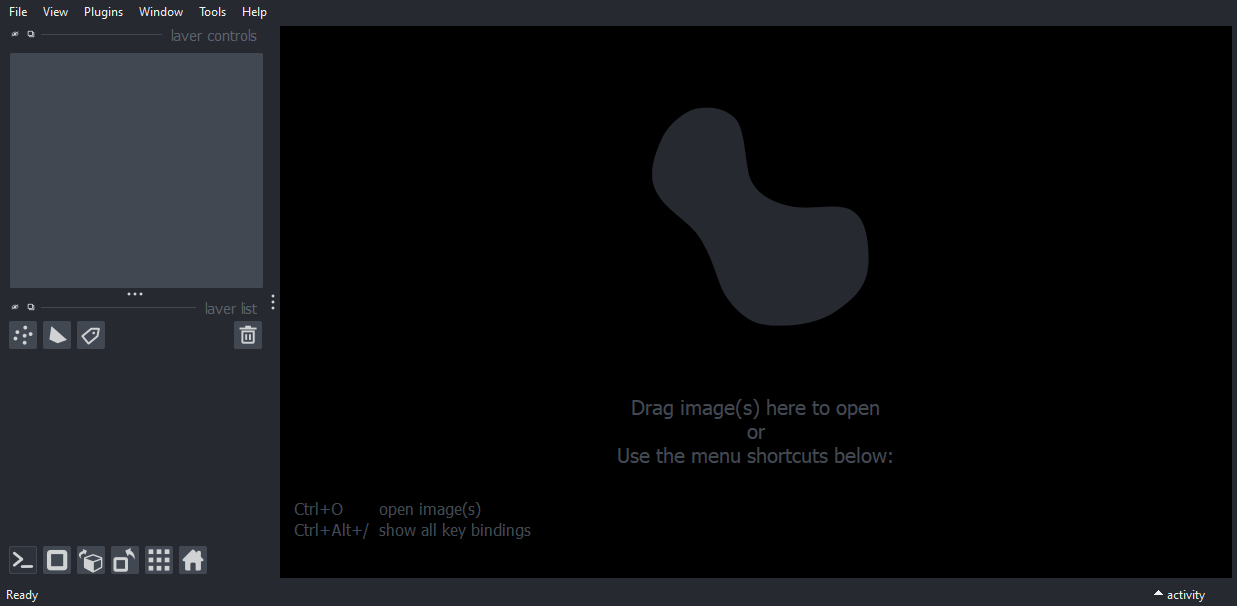

In [4]:
napari.utils.nbscreenshot(viewer)

# Opening images in napari from a notebook

Now, let's load some example images here and visualize them in napari. This loads a 3D image:

In [5]:
mri = imread("data/Haase_MRT_tfl3d1.tif")
mri.shape

(192, 256, 256)

To open an image in napari from a notebook, we use the command `add_image()` from the `viewer`.

In [6]:
viewer.add_image(mri)

<Image layer 'mri' at 0x225d5c7cd10>

This adds the image as a `layer` in napari. The layers list can be seen at the bottom left of the screen. For now, we have a single image layer there. Let's take a new screenshot so that it's late reproducible what we're doing.

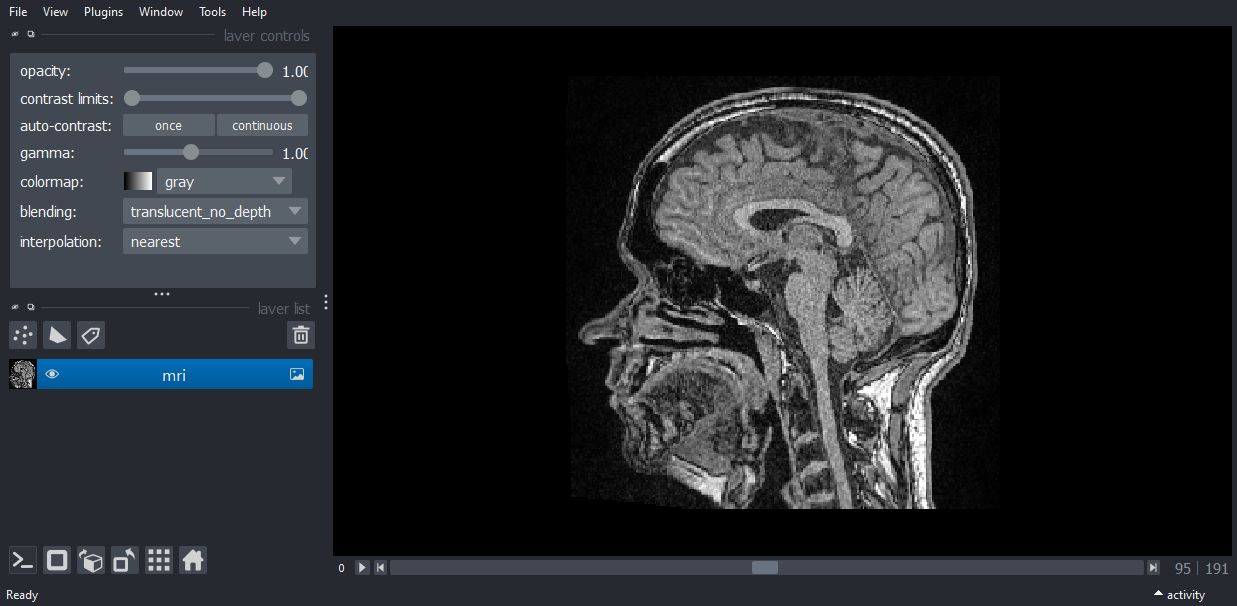

In [7]:
napari.utils.nbscreenshot(viewer)

## Visualization configuration
We can configure how to view the data when adding it to the viewer. We can for example tune the `contrast_limits`.

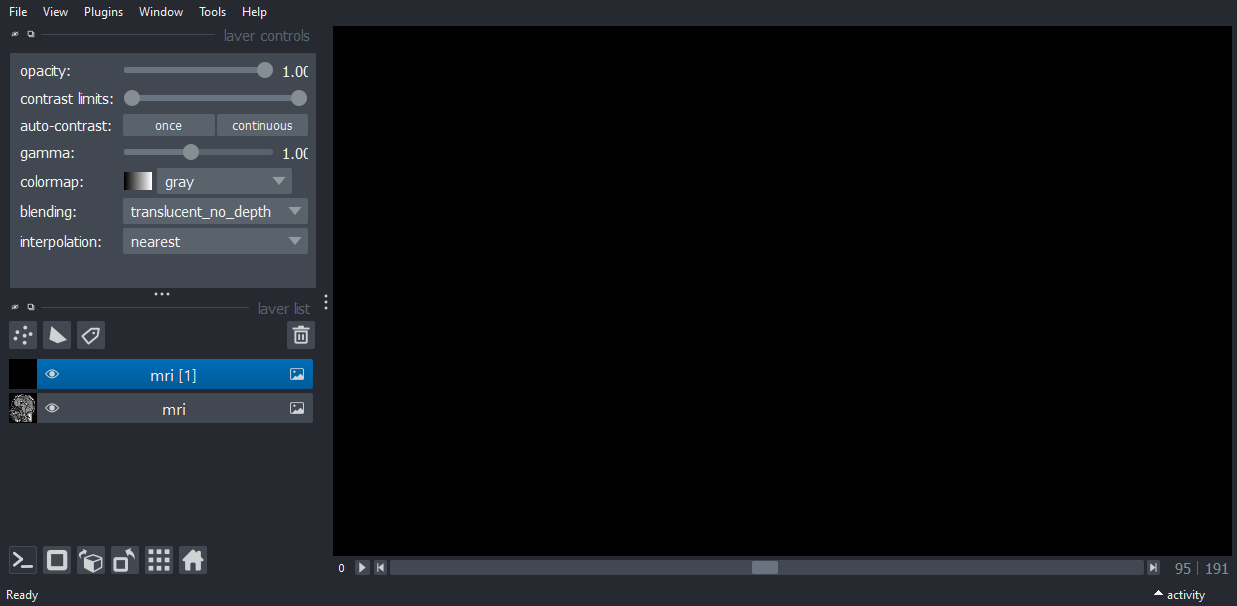

In [8]:
viewer.add_image(mri, contrast_limits=(12000, 40000))

napari.utils.nbscreenshot(viewer)

We can also keep the layer that was just added to napari in a variable and modify visualization afterwwards.

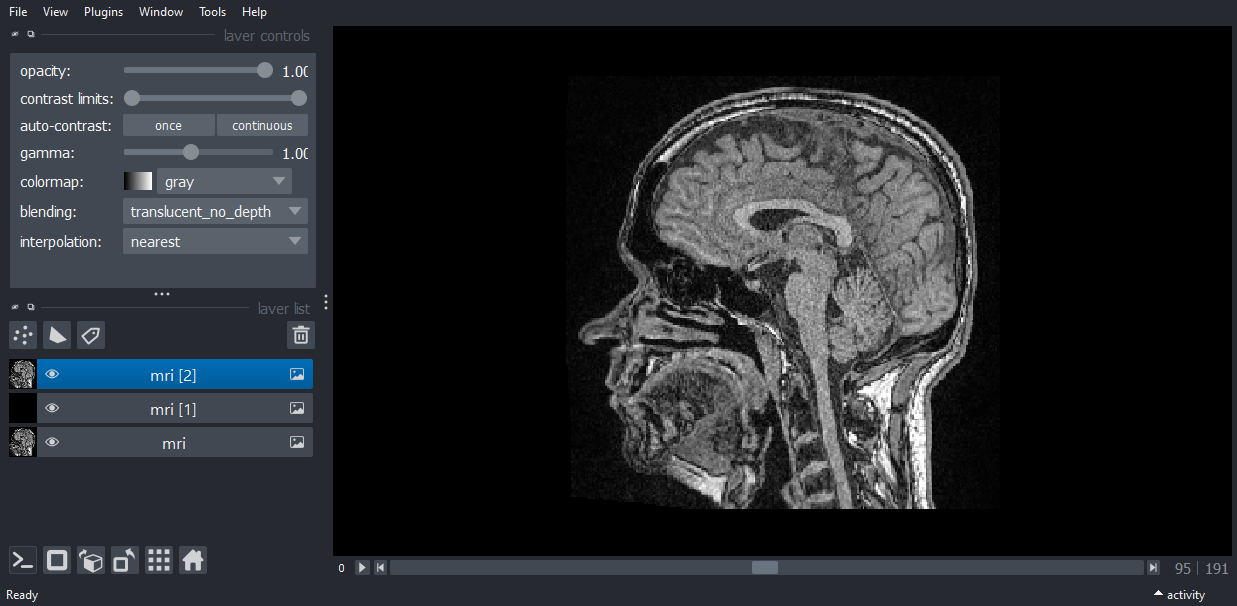

In [9]:
image_layer = viewer.add_image(mri)

napari.utils.nbscreenshot(viewer)

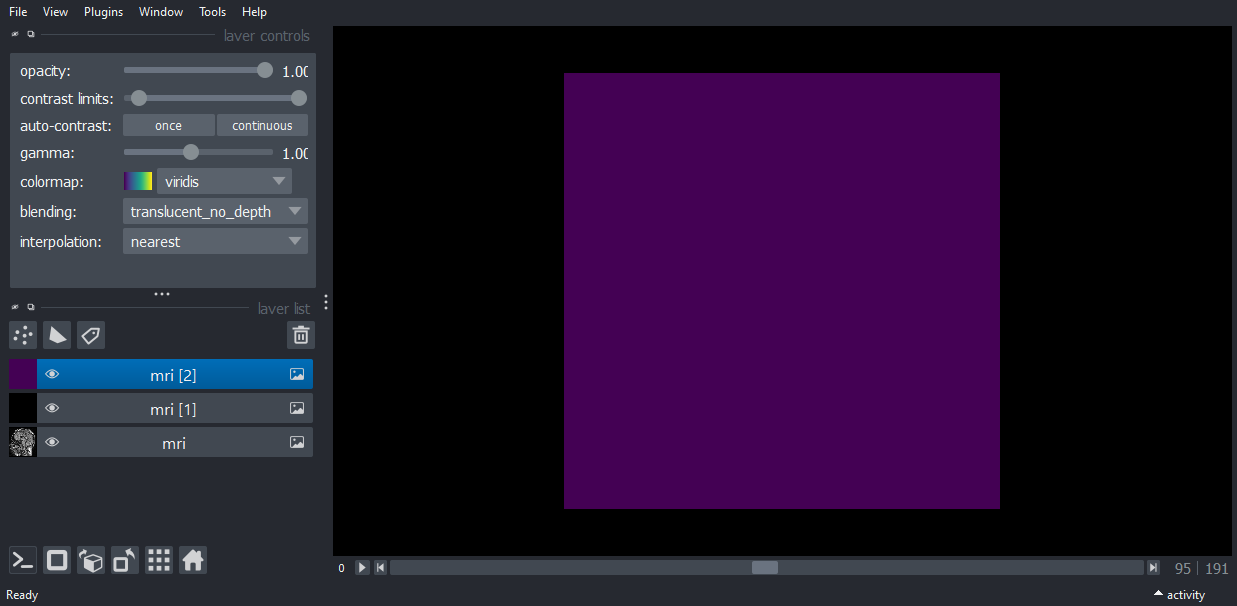

In [10]:
image_layer.contrast_limits = (2000, 50000)
image_layer.colormap = "viridis"

napari.utils.nbscreenshot(viewer)

## Removing layers
We can also remove layers, for example the second one (that has index `1`).

In [11]:
viewer.layers.remove(viewer.layers[1])

Or we remove the last one (on top, which has index -1).

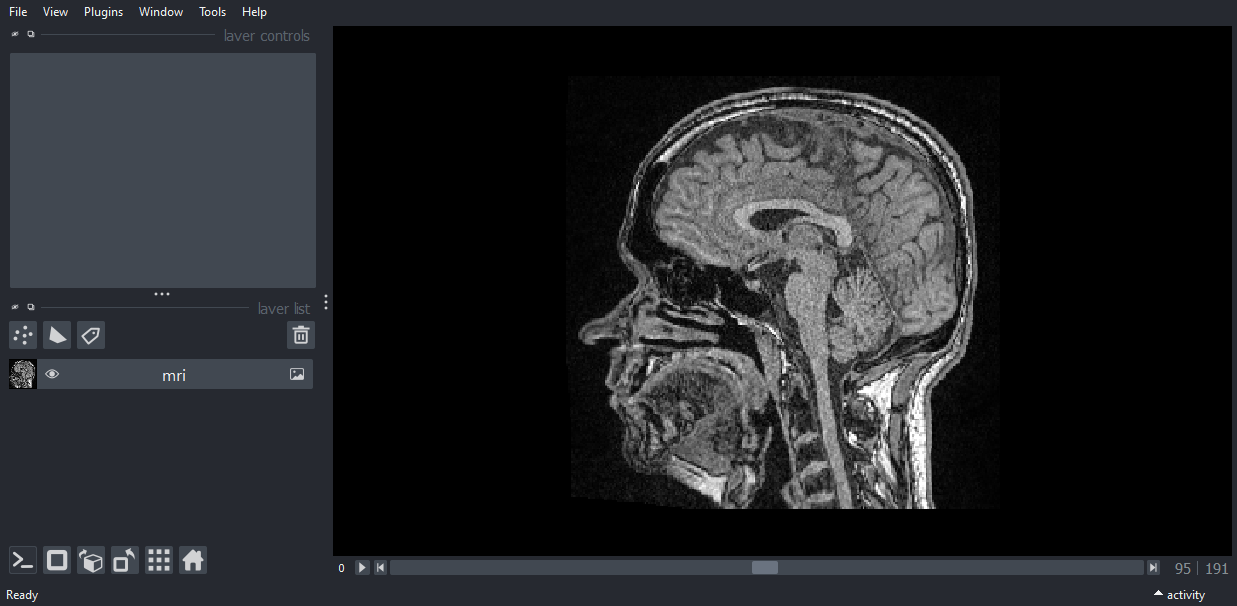

In [12]:
viewer.layers.remove(viewer.layers[-1])

napari.utils.nbscreenshot(viewer)

## Segmentation visualization

You can also add a segmentation result to the viewer, which will get overlayed with the original image.

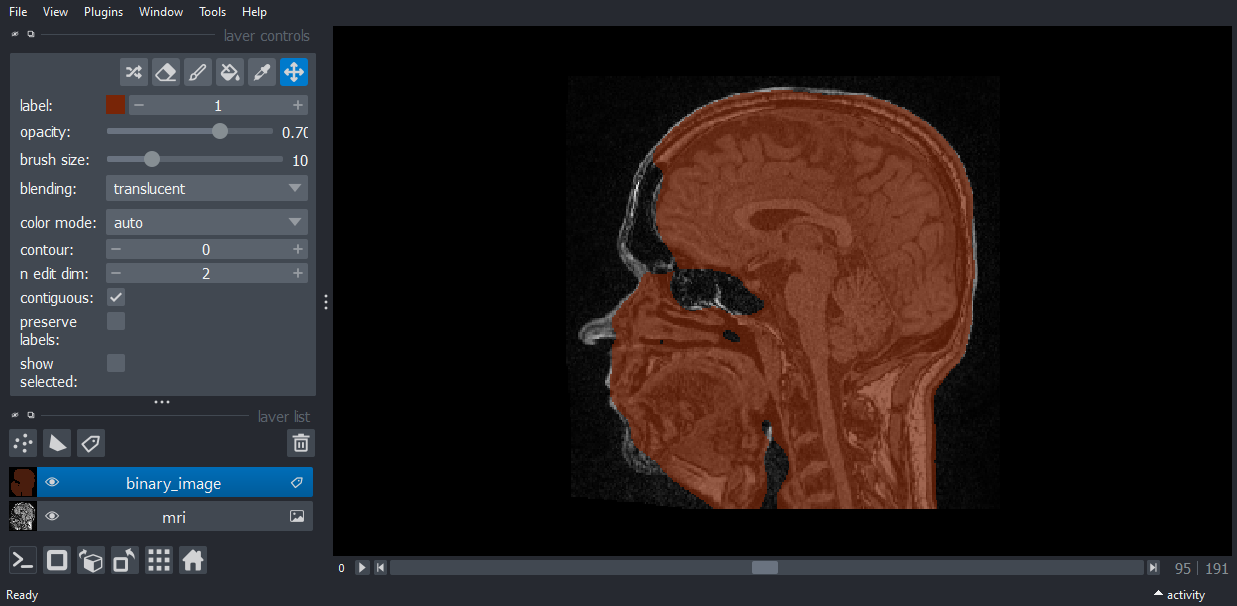

In [13]:
blurred = gaussian(mri, sigma=5)

binary_image = blurred > threshold_otsu(blurred)

viewer.add_labels(binary_image)

napari.utils.nbscreenshot(viewer)

Segmentation results can also be visualized with their outlines.

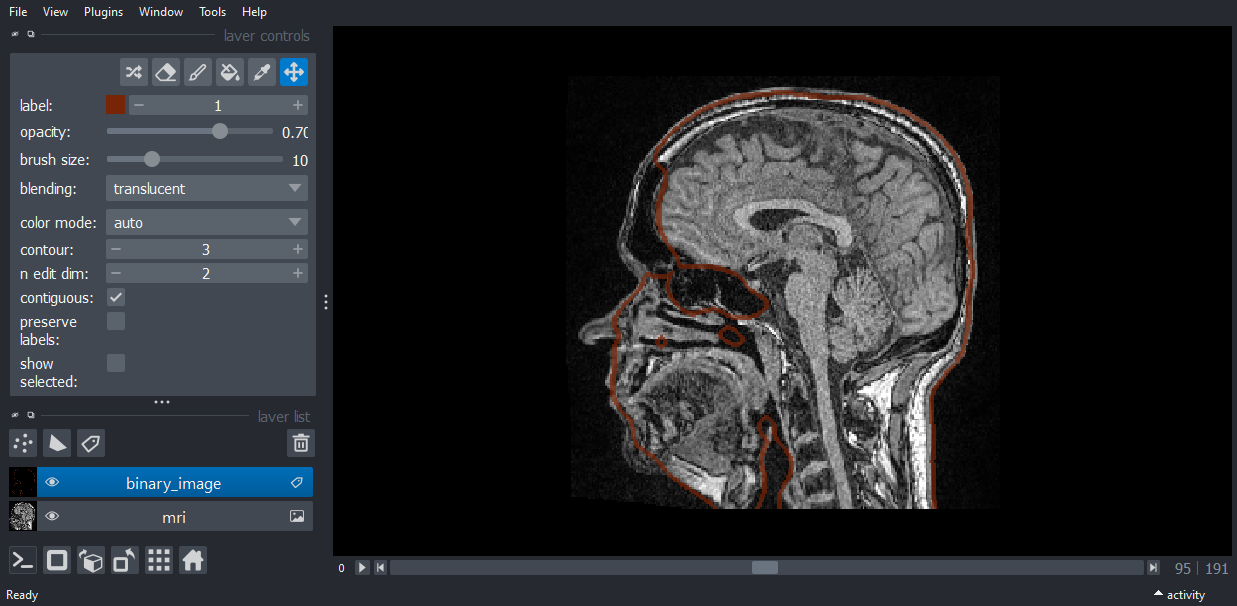

In [14]:
labels_layer = viewer.layers[-1]

labels_layer.contour = 3

napari.utils.nbscreenshot(viewer)

## Exercise
Create another `viewer` window and add the image `data/Lund_000500_resampled-cropped.tif`. Label hte nuclei in the image and add the result to a new viewer.
Hint: Consider using a background-removal filter before segmenting the image.